# Zestaw 2

## Zadanie 1

In [1]:
import numpy as np

Możliwe stany serwera:
- _s0_ - 0 zalogowanych
- _s1_ - 1 zalogowany
- _s2_ - 2 zalogowanych

In [2]:
p_in = 0.2
p_out = 0.5

In [3]:
p00 = (1-p_in) ** 2
p01 = p_in * (1-p_in) * 2
p02 = p_in**2
p10 = p_out * (1-p_in)
p11 = p_in * p_out + (1-p_in) * (1-p_out)
p12 = (1-p_out) * p_in
p20 = p_out**2
p21 = p_out * (1-p_out) * 2
p22 = (1-p_out)**2

P = np.array([
    [p00, p01, p02],
    [p10, p11, p12],
    [p20, p21, p22]
]) 
assert np.allclose(P.sum(axis=1), 1)
P

array([[0.64, 0.32, 0.04],
       [0.4 , 0.5 , 0.1 ],
       [0.25, 0.5 , 0.25]])

## Zadanie 2

In [4]:
from matplotlib import pyplot as plt

In [5]:
eps = 1e-05
wartosci_z_wykladu = (0.5102, 0.4082, 0.0816)

In [6]:
Pn_old = P
Pn = P @ P
n = 2
diagonal = [Pn_old.diagonal(), Pn.diagonal()]

while not np.all(abs(Pn - Pn_old) < eps):
    Pn_old = Pn
    Pn = Pn @ P
    diagonal.append(Pn.diagonal())
    n += 1
    
n_bar = n
print(n_bar)

11


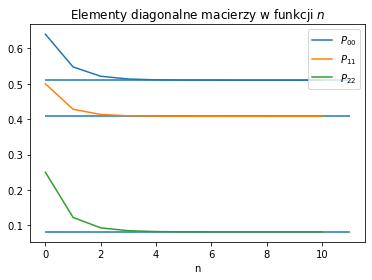

In [7]:
plt.figure()
plt.title("Elementy diagonalne macierzy w funkcji $n$")
plt.plot(diagonal)
plt.hlines(wartosci_z_wykladu, 0, n_bar)
plt.xlabel("n")
plt.legend(['$P_{00}$', '$P_{11}$', '$P_{22}$'])
plt.savefig("zadanie2.png", facecolor='white')
plt.show()

In [8]:
np.allclose(Pn.diagonal(), wartosci_z_wykladu, 0.0005)

True

In [9]:
Pn.diagonal() - wartosci_z_wykladu

array([ 4.80468189e-06, -3.64093206e-05,  3.33761118e-05])

## Zadanie 3

In [10]:
from numpy.random import uniform

state = 0
N = 10**4
states = 2
end_states = np.zeros(shape=(3,))

def next_state(from_state):
    u = uniform()
    row = P[from_state]
    cdf = np.array([np.sum(row[:i+1]) for i in range(len(row))])
    return min(np.where(u <= cdf)[0])

for from_state in range(states+1):
    state = from_state
    for _ in range(N):
        for n in range(n_bar):
            state = next_state(state)
        end_states[state] += 1


In [11]:
end_states = end_states / (N * (states+1))

In [12]:
end_states - wartosci_z_wykladu

array([ 6.66666667e-05,  1.53333333e-03, -1.60000000e-03])

## Zadanie 4

In [13]:
import math
def comb(n, k):
    if hasattr(math, 'comb'):
        return math.comb(n, k)
    else:
        num = math.factorial(n)
        denom = math.factorial(k) * math.factorial(n-k)
        return int(num / denom)
    
def macierz_przejscia(n, p_in, p_out):
    P = np.zeros([n+1, n+1])
    for i in range(n+1):
        for j in range(n+1):
            if i < j:
                Login = range(j-i, min(j+1, n-i+1))
                Logout = range(0, i+1)
            else:
                Login = range(0, j+1)
                Logout = range(i-j, min(i+1, n-j+1))
            
            Actions = list(zip(Login, Logout))
            P[i][j] = sum( [  comb(n-i, a_in)  * p_in**a_in   * (1-p_in)**(n-i-a_in)  \
                            * comb(i,   a_out) * p_out**a_out * (1-p_out)**(i-a_out)  \
                          for (a_in, a_out) in Actions])
            
    assert np.allclose(P.sum(axis=1), 1)
    return P

In [14]:
eps = 1e-05

In [15]:
p_in = 0.2
p_out = 0.5
users = 100
P = macierz_przejscia(users, p_in, p_out)

Pn_old = P
Pn = P @ P
n = 2
diagonal = [Pn_old.diagonal(), Pn.diagonal()]

while not np.all(abs(Pn - Pn_old) < eps):
    Pn_old = Pn
    Pn = Pn @ P
    diagonal.append(Pn.diagonal())
    n += 1
    
n_bar = n
print(n_bar)

11


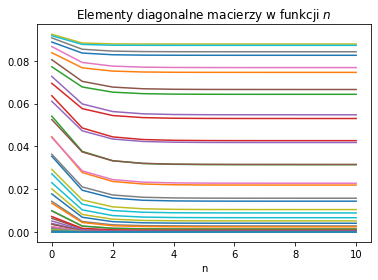

In [16]:
plt.figure()
plt.title("Elementy diagonalne macierzy w funkcji $n$")
plt.plot(diagonal)
plt.xlabel("n")
plt.savefig("zadanie4.png", facecolor='white')
plt.show()

In [17]:
np.allclose(Pn.sum(axis=1), 1)

True

## Zadanie 5

In [19]:
N = 10**4
states = users
end_states = np.zeros(shape=(states+1,))

cdf = np.add.accumulate(P, axis=1)

def next_state(from_state):
    u = uniform()
    row = P[from_state]
    return min(np.where(u <= cdf[from_state])[0])

for from_state in range(states+1):
    state = from_state
    for _ in range(N):
        for n in range(n_bar):
            state = next_state(state)
        end_states[state] += 1


In [20]:
end_states_normalised = end_states / (N * (states+1))

In [21]:
print(end_states_normalised[0])

0.0


In [22]:
print(end_states_normalised[-1])

0.0


In [23]:
eps = 0.1
np.all([
    np.allclose(
        end_states_normalised[0],
        end_states_normalised[i],
        atol=eps)
    for i in range(1, 101)
])

True

In [24]:
end_states_normalised.sum()

1.0

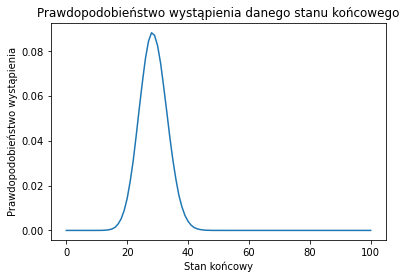

In [25]:
plt.plot(end_states_normalised)
plt.xlabel("Stan końcowy")
plt.ylabel("Prawdopodobieństwo wystąpienia")
plt.title("Prawdopodobieństwo wystąpienia danego stanu końcowego")
plt.savefig("zadanie5.png", facecolor='white')
plt.show()

In [29]:
np.add.accumulate(P, axis=1)

array([[2.03703598e-10, 5.29629354e-09, 6.83170941e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.27314749e-10, 3.40566952e-09, 4.51569499e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.95717178e-11, 2.18822224e-09, 2.98045816e-08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.01948392e-30, 2.00938650e-28, 9.89862664e-27, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.26217745e-30, 1.26533289e-28, 6.28059498e-27, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.88860905e-31, 7.96749514e-29, 3.98453643e-27, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])